# Modeling and Simulation in Python

Insulin minimal model

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [99]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Data

We have data from Pacini and Bergman (1986), "MINMOD: a computer program to calculate insulin sensitivity and pancreatic responsivity from the frequently sampled intravenous glucose tolerance test", *Computer Methods and Programs in Biomedicine*, 23: 113-122..

In [100]:
data = pd.read_csv('data/glucose_insulin.csv', index_col='time')
#I = interpolate(data.insulin)
G = interpolate(data.glucose)

The return value from `interpolate` is a function.

### The insulin minimal model

In addition to the glucose minimal mode, Pacini and Bergman present an insulin minimal model, in which the concentration of insulin, $I$, is governed by this differential equation:

$ \frac{dI}{dt} = -k I(t) + \gamma (G(t) - G_T) t $

**Exercise:**  Write a version of `make_system` that takes the parameters of this model, `I0`, `k`, `gamma`, and `G_T` as parameters, along with a `DataFrame` containing the measurements, and returns a `System` object suitable for use with `run_simulation` or `run_odeint`.

Use it to make a `System` object with the following parameters:

In [101]:
params = Params(I0 = 360,
                k = 0.25,
                γ = 0.004,
                G_T = 80)

,values
I0,360.000
k,0.250
γ,0.004
G_T,80.000


In [102]:
def make_system(params, data):
    I0, k, γ, G_T = params
    
    Gb = data.glucose[0]
    Ib = data.insulin[0]
    
    t_0 = get_first_label(data)
    t_end = get_last_label(data)
    
    init = State(I=I0)
    
    return System(I0=I0, k=k,γ=γ,G_T=G_T,
                 init=init, Gb=Gb, Ib=Ib,
                 t_0=t_0,t_end=t_end,dt=2)

In [103]:
system = make_system(params, data)
state = State(I=360)

,values
I,360


**Exercise:** Write a slope function that takes state, t, system as parameters and returns the derivative of `I` with respect to time.  Test your function with the initial condition $I(0)=360$.

In [104]:
def slope_func(state,t,system):
    I = state
    unpack(system)
    
    dIdt = -1*k*I + γ*(G(t) - G_T)*t
    return dIdt

In [105]:
slope_func(state,0,system)

I   -90.0
dtype: float64

**Exercise:** Run `run_ode_solver` with your `System` object and slope function, and plot the results, along with the measured insulin levels.

In [106]:
system = make_system(params, data)
results, details = run_ode_solver(system, slope_func,t_eval=data.index)  

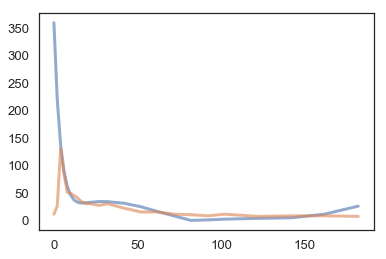

In [107]:
plot(results.I)
plot(data.insulin)

**Exercise:**  Write an error function that takes a sequence of parameters as an argument, along with the `DataFrame` containing the measurements.  It should make a `System` object with the given parameters, run it, and compute the difference between the results of the simulation and the measured values.  Test your error function by calling it with the parameters from the previous exercise.

Hint: As we did in a previous exercise, you might want to drop the errors for times prior to `t=8`.

In [108]:
def error_func(params, data):
    system = make_system(params, data)
    results, details = run_ode_solver(system, slope_func,t_eval=data.index)
    
    errors = results.I - data.insulin
    return errors.loc[8:]

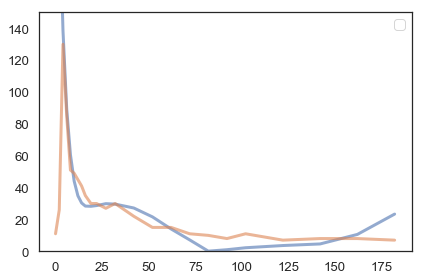

In [109]:
best_params, fit_details = fit_leastsq(error_func, params, data)
system = make_system(best_params, data)
results, details = run_ode_solver(system, slope_func, t_eval=data.index)
plot(results.I)
plot(data.insulin)
decorate(ybound = (0,150))

**Exercise:** Use `fit_leastsq` to find the parameters that best fit the data.  Make a `System` object with those parameters, run it, and plot the results along with the measurements.

In [110]:
# Solution goes here

In [111]:
# Solution goes here

In [112]:
# Solution goes here

In [113]:
# Solution goes here

**Exercise:** Using the best parameters, estimate the sensitivity to glucose of the first and second phase pancreatic responsivity:

$ \phi_1 = \frac{I_{max} - I_b}{k (G_0 - G_b)} $

$ \phi_2 = \gamma \times 10^4 $

For $G_0$, use the best estimate from the glucose model, 290.  For $G_b$ and $I_b$, use the inital measurements from the data.


In [121]:

ϕ1 = (data.insulin.max() - data.insulin[0]) / (k*(289-data.glucose[0]))

2.4175429629119902

In [115]:
# Solution goes here

In [116]:
# Solution goes here

In [117]:
# Solution goes here

In [118]:
# Solution goes here